In [10]:
import pandas as pd
import json

# 读取Excel文件
# excel_path = '/data1/dxw_data/llm/RAG-mkt-kmeans/data1/cleaned_comments_dianping_hotpot.xlsx'  # 替换为你的Excel文件路径
# excel_path = '/data1/dxw_data/llm/RAG-mkt-kmeans/data2/cleaned_comments_dianping_barbecue.xlsx'
excel_path = '/data1/dxw_data/llm/RAG-mkt-kmeans/data3/cleaned_comments_dianping_cake.xlsx'
sheet_name = 'Sheet1'  # 替换为你的Sheet名称

# 读取指定列
df = pd.read_excel(excel_path, sheet_name=sheet_name, usecols=['cleaned_comment'])

# 将列数据转换为列表，并处理datetime对象
def convert_to_serializable(val):
    if isinstance(val, pd.Timestamp):
        return val.strftime('%Y-%m-%d')
    return str(val)  # 将所有非字符串类型转换为字符串

title_4_list = df['cleaned_comment'].dropna().apply(convert_to_serializable).tolist()

# 保存为JSON文件
# json_path = '/data1/dxw_data/llm/RAG-mkt-kmeans/data1/cleaned_comments_dianping_hotpot.json'  # 替换为你的输出JSON文件路径
# json_path = '/data1/dxw_data/llm/RAG-mkt-kmeans/data2/cleaned_comments_dianping_barbecue.json'
json_path = '/data1/dxw_data/llm/RAG-mkt-kmeans/data3/cleaned_comments_dianping_cake.json'
with open(json_path, 'w', encoding='utf-8') as f:
    json.dump(title_4_list, f, ensure_ascii=False, indent=4)

print(f"数据已保存到 {json_path}！")


数据已保存到 /data1/dxw_data/llm/RAG-mkt-kmeans/data3/cleaned_comments_dianping_cake.json！


In [2]:
# import json
# import numpy as np
# from sklearn.cluster import KMeans
# from sentence_transformers import SentenceTransformer

# # Load the JSON file
# json_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data/cleaned_comments_dianping_hotpot.json"
# with open(json_file_path, 'r', encoding='utf-8') as f:
#     data = json.load(f)

# # Load the pre-trained model
# model_path = '/data1/dxw_data/llm/text2vec-large-chinese'
# model = SentenceTransformer(model_path)

# # Convert each element in the JSON file to a vector
# vectors = model.encode(data)

# # Perform KMeans clustering
# num_clusters = 20
# kmeans = KMeans(n_clusters=num_clusters, random_state=0)
# kmeans.fit(vectors)

# # Get cluster labels
# labels = kmeans.labels_

# # Save clustering results
# results = {"text": data, "cluster": labels.tolist()}
# output_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data/clustering_results.json"
# with open(output_file_path, 'w', encoding='utf-8') as f:
#     json.dump(results, f, ensure_ascii=False, indent=4)

# # Find the representative text for each cluster
# representatives = []
# for i in range(num_clusters):
#     cluster_indices = np.where(labels == i)[0]
#     cluster_vectors = vectors[cluster_indices]
#     cluster_center = kmeans.cluster_centers_[i]
#     distances = np.linalg.norm(cluster_vectors - cluster_center, axis=1)
#     representative_index = cluster_indices[np.argmin(distances)]
#     representatives.append(data[representative_index])

# # Save the representative texts
# representative_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data/representative_texts.json"
# with open(representative_file_path, 'w', encoding='utf-8') as f:
#     json.dump(representatives, f, ensure_ascii=False, indent=4)

# print("Clustering and representative text extraction complete. Results saved to:")
# print("Clustering results:", output_file_path)
# print("Representative texts:", representative_file_path)


No sentence-transformers model found with name /data1/dxw_data/llm/text2vec-large-chinese. Creating a new one with MEAN pooling.
/home/dxw/anaconda3/envs/agent/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clustering and representative text extraction complete. Results saved to:
Clustering results: /data1/dxw_data/llm/RAG-mkt-kmeans/data/clustering_results.json
Representative texts: /data1/dxw_data/llm/RAG-mkt-kmeans/data/representative_texts.json


In [ ]:
# -----------最新代码，同时也输出，非常好看的图

No sentence-transformers model found with name /data1/dxw_data/llm/text2vec-large-chinese. Creating a new one with MEAN pooling.


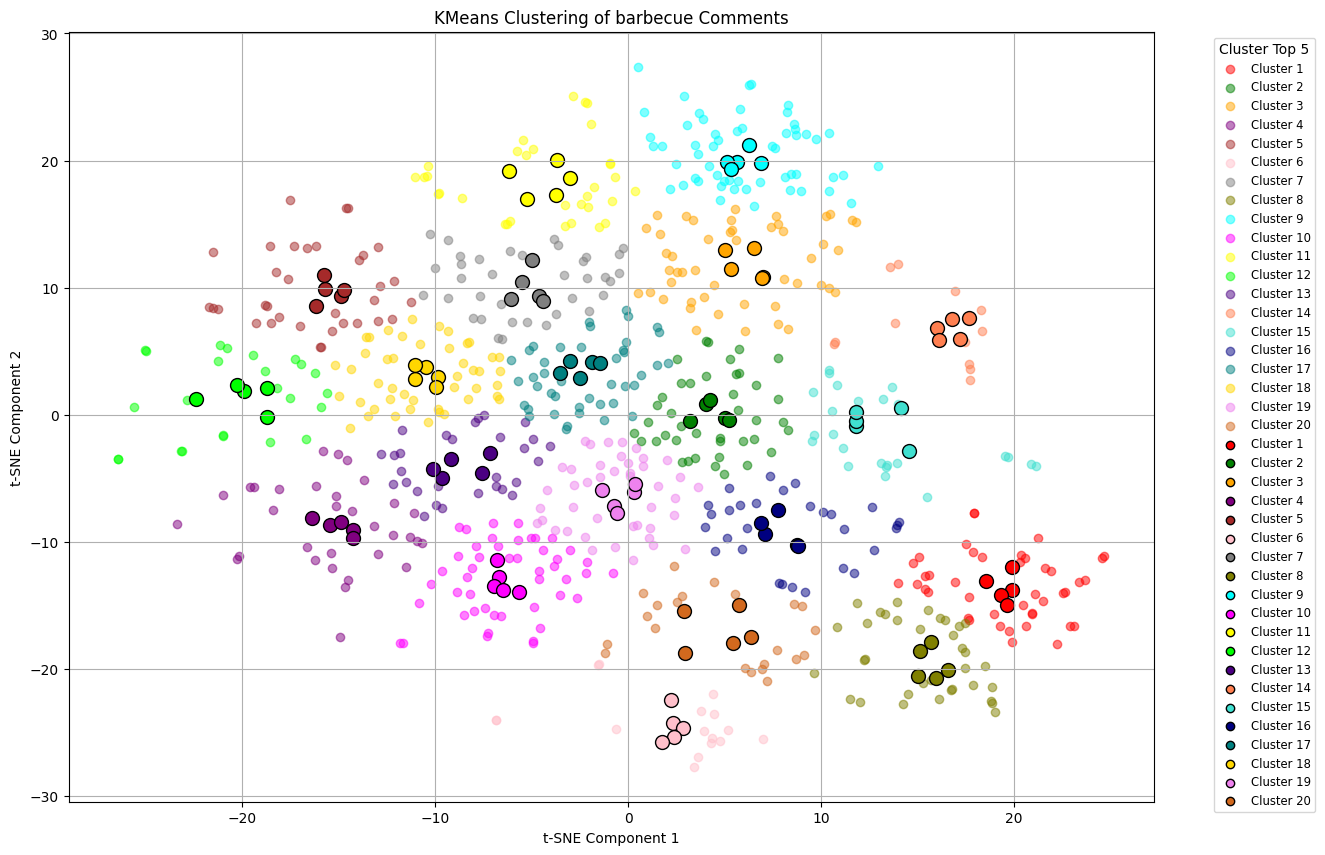

Clustering and representative text extraction complete. Results saved to:
Clustering results: /data1/dxw_data/llm/RAG-mkt-kmeans/data2/clustering_results.json
Representative texts: /data1/dxw_data/llm/RAG-mkt-kmeans/data2/representative_texts.json
Cluster plot: /data1/dxw_data/llm/RAG-mkt-kmeans/data2/cluster_plot.png


In [13]:
import json
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

# Load the JSON file
# json_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data1/cleaned_comments_dianping_hotpot.json"
# json_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data2/cleaned_comments_dianping_barbecue.json"
json_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data3/cleaned_comments_dianping_cake.json"
with open(json_file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Load the pre-trained model
model_path = '/data1/dxw_data/llm/text2vec-large-chinese'
model = SentenceTransformer(model_path)

# Convert each element in the JSON file to a vector
vectors = model.encode(data)

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_vectors = tsne.fit_transform(vectors)

# Perform KMeans clustering with adjusted parameters
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=20, max_iter=500)
kmeans.fit(tsne_vectors)

# Get cluster labels
labels = kmeans.labels_

# Save clustering results
results = {"text": data, "cluster": labels.tolist()}
# output_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data1/clustering_results.json"
# output_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data2/clustering_results.json"
output_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data3/clustering_results.json"
with open(output_file_path, 'w', encoding='utf-8') as f:
    json.dump(results, f, ensure_ascii=False, indent=4)

# Find the representative text for each cluster
representatives = []
top5_central_points = []

for i in range(num_clusters):
    cluster_indices = np.where(labels == i)[0]
    cluster_vectors = tsne_vectors[cluster_indices]
    cluster_center = kmeans.cluster_centers_[i]
    distances = np.linalg.norm(cluster_vectors - cluster_center, axis=1)
    representative_index = cluster_indices[np.argmin(distances)]
    representatives.append(data[representative_index])
    
    # Get top 5 central points
    top5_indices = cluster_indices[np.argsort(distances)[:5]]
    top5_central_points.extend(top5_indices)

# Save the representative texts
# representative_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data1/representative_texts.json"
# representative_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data2/representative_texts.json"
representative_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data3/representative_texts.json"
with open(representative_file_path, 'w', encoding='utf-8') as f:
    json.dump(representatives, f, ensure_ascii=False, indent=4)

# Visualize clustering
plt.figure(figsize=(14, 10))

# Define colors for each cluster
colors = [
    'red', 'green', 'orange', 'purple', 'brown', 'pink', 
    'gray', 'olive', 'cyan', 'magenta', 'yellow', 'lime', 
    'indigo', 'coral', 'turquoise', 'navy', 'teal', 'gold', 
    'violet', 'chocolate'
]

# Plot all points with cluster-specific colors
for i in range(num_clusters):
    cluster_indices = np.where(labels == i)[0]
    plt.scatter(tsne_vectors[cluster_indices, 0], tsne_vectors[cluster_indices, 1], color=colors[i], alpha=0.5, label=f'Cluster {i+1}')

# Highlight top 5 central points with different colors
for i in range(num_clusters):
    top5_indices = np.where(labels == i)[0][np.argsort(np.linalg.norm(tsne_vectors[np.where(labels == i)[0]] - kmeans.cluster_centers_[i], axis=1))[:5]]
    for j, index in enumerate(top5_indices):
        plt.scatter(tsne_vectors[index, 0], tsne_vectors[index, 1], color=colors[i], edgecolor='black', s=100)

# Add a legend for the clusters
for i in range(num_clusters):
    plt.scatter([], [], color=colors[i], edgecolor='black', label=f'Cluster {i+1}')

plt.title('KMeans Clustering of barbecue Comments')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small', title='Cluster Top 5')
plt.grid(True)

# Save the plot
# plot_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data1/cluster_plot.png"
# plot_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data2/cluster_plot.png"
plot_file_path = "/data1/dxw_data/llm/RAG-mkt-kmeans/data3/cluster_plot.png"
plt.savefig(plot_file_path, bbox_inches='tight')
plt.show()

print("Clustering and representative text extraction complete. Results saved to:")
print("Clustering results:", output_file_path)
print("Representative texts:", representative_file_path)
print("Cluster plot:", plot_file_path)
